**Summer Olympic Games**

*From 1896 to 2024.*

Dataset from Kaggle: https://www.kaggle.com/datasets/stefanydeoliveira/summer-olympics-medals-1896-2024/data

Data Analyst: ***Zsófia Kadler***

Historical Coverage: The dataset includes detailed records from the early days of the Olympics, starting in Athens 1896, all the way through the 2024 Summer Games in Paris. It captures a wide array of events, sports, and athletes over time.

Columns explication:

- **player_id:** Unique identifier for each athlete.
- **Name:** Name of the athlete.
- **Sex:** Gender of the athlete (Male (M) /Female (F)).
- **Team:** Country the athlete represented.
- **NOC:** National Olympic Committee code for the country.
- **Year:** Year of the Olympic Games.
- **Season:** Season of the Olympic Games (Summer).
- **City:** Host city of the Olympic Games.
- **Sport:** Sport category in which the athlete competed.
- **Event:** Specific event within the sport.
- **Medal:** Type of medal awarded (Gold, Silver, Bronze) or "No medal" if not awarded.

# Install libraries & load data

In [46]:
# Import libreries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
df = pd.read_csv("C:\\Users\\Usuario\\OneDrive\\Documentos\\Zsofia Data Analytics\\Olympic games project\\olympics_dataset.csv")

In [48]:
df.head(2)

,player_id,Name,Sex,Team,NOC,Year,Season,City,Sport,Event,Medal
0,0,A Dijiang,M,China,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No medal
1,1,A Lamusi,M,China,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No medal


# Checking structure & columns 

In [49]:
# Check structure
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252565 entries, 0 to 252564
Data columns (total 11 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   player_id  252565 non-null  int64 
 1   Name       252565 non-null  object
 2   Sex        252565 non-null  object
 3   Team       252565 non-null  object
 4   NOC        252565 non-null  object
 5   Year       252565 non-null  int64 
 6   Season     252565 non-null  object
 7   City       252565 non-null  object
 8   Sport      252565 non-null  object
 9   Event      252565 non-null  object
 10  Medal      252565 non-null  object
dtypes: int64(2), object(9)
memory usage: 21.2+ MB


(252565, 11)

In [50]:
# Remove duplicates
df.drop_duplicates(inplace=True)
df.shape

(252565, 11)

In [51]:
# Check for missing values
missing_values = df.isnull().sum()
total_entries = df.shape[0]
missing_percentage = (missing_values / total_entries) * 100
print("Missing values per column:")
print(pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage}))

Missing values per column:
           Missing Values  Percentage
player_id               0         0.0
Name                    0         0.0
Sex                     0         0.0
Team                    0         0.0
NOC                     0         0.0
Year                    0         0.0
Season                  0         0.0
City                    0         0.0
Sport                   0         0.0
Event                   0         0.0
Medal                   0         0.0


In [53]:
# Handle inconsistencies
df.rename(columns={'Sex': 'Gender'}, inplace=True)
df['Gender'] = df['Gender'].replace({'M': 'Male', 'F': 'Female'})

# Rename column 'player_id'
df.rename(columns={'player_id': 'ID'}, inplace=True)

In [54]:
# Check datatypes
df.dtypes # we don´t change the data tyepes as we will correct them later in PowerBI

ID         int64
Name      object
Gender    object
Team      object
NOC       object
Year       int64
Season    object
City      object
Sport     object
Event     object
Medal     object
dtype: object

In [55]:
# Display distinct values for each column
for column in df.columns:
    print(f"Distinct values in '{column}':")
    print(df[column].unique())
    print()

Distinct values in 'ID':
[      0       1       2 ... 1972077 1899865 1924402]

Distinct values in 'Name':
['A Dijiang' 'A Lamusi' 'Gunnar Aaby' ... 'Emanuela Liuzzi' 'Isayah Boers'
 'Charlie Carvell']

Distinct values in 'Gender':
['Male' 'Female']

Distinct values in 'Team':
['China' 'Denmark' 'Denmark/Sweden' ... 'Lao PDR' 'DR Congo' 'DPR Korea']

Distinct values in 'NOC':
['CHN' 'DEN' 'NED' 'FIN' 'NOR' 'ROU' 'EST' 'FRA' 'MAR' 'ESP' 'EGY' 'IRI'
 'BUL' 'ITA' 'CHA' 'AZE' 'SUD' 'RUS' 'ARG' 'CUB' 'BLR' 'GRE' 'CMR' 'TUR'
 'CHI' 'MEX' 'USA' 'URS' 'NCA' 'HUN' 'NGR' 'ALG' 'KUW' 'BRN' 'PAK' 'IRQ'
 'UAR' 'LIB' 'QAT' 'MAS' 'GER' 'CAN' 'IRL' 'AUS' 'RSA' 'ERI' 'TAN' 'JOR'
 'TUN' 'LBA' 'BEL' 'DJI' 'PLE' 'COM' 'KAZ' 'BRU' 'IND' 'KSA' 'SYR' 'MDV'
 'ETH' 'UAE' 'YAR' 'INA' 'PHI' 'SGP' 'UZB' 'KGZ' 'TJK' 'EUN' 'JPN' 'CGO'
 'SUI' 'BRA' 'GDR' 'MON' 'ISR' 'URU' 'SWE' 'SRI' 'ARM' 'CIV' 'KEN' 'BEN'
 'GBR' 'GHA' 'SOM' 'NIG' 'MLI' 'AFG' 'POL' 'CRC' 'PAN' 'GEO' 'SLO' 'GUY'
 'NZL' 'POR' 'PAR' 'ANG' 'VEN' 'COL' 

In [98]:
# Check if the ID column is correct
# Filter all rows where the Name contains 'Kammerer' from canoeing sport - Kammerer Zoltán
kammerer_data = df[df['Name'].str.contains('Kammerer', case=False, na=False)]

# Display the filtered data
kammerer_data

,ID,Name,Gender,Team,NOC,Year,Season,City,Sport,Event,Medal
92998,112701,Zoltn Kammerer,Male,Hungary,HUN,1996,Summer,Atlanta,Canoeing,"Canoeing Men's Kayak Singles, 1,000 metres",No medal
92999,112702,Zoltn Kammerer,Male,Hungary,HUN,2000,Summer,Sydney,Canoeing,"Canoeing Men's Kayak Doubles, 500 metres",Gold
93000,112703,Zoltn Kammerer,Male,Hungary,HUN,2000,Summer,Sydney,Canoeing,"Canoeing Men's Kayak Fours, 1,000 metres",Gold
93001,112704,Zoltn Kammerer,Male,Hungary,HUN,2004,Summer,Athina,Canoeing,"Canoeing Men's Kayak Doubles, 500 metres",No medal
93002,112705,Zoltn Kammerer,Male,Hungary,HUN,2004,Summer,Athina,Canoeing,"Canoeing Men's Kayak Fours, 1,000 metres",Gold
93003,112706,Zoltn Kammerer,Male,Hungary,HUN,2008,Summer,Beijing,Canoeing,"Canoeing Men's Kayak Doubles, 500 metres",No medal
93004,112707,Zoltn Kammerer,Male,Hungary,HUN,2008,Summer,Beijing,Canoeing,"Canoeing Men's Kayak Doubles, 1,000 metres",No medal
93005,112708,Zoltn Kammerer,Male,Hungary,HUN,2012,Summer,London,Canoeing,"Canoeing Men's Kayak Fours, 1,000 metres",Silver


## Note

*The Name column is a bit chaotic, but we can still understand the associations. However, the names are not correctly written. It's important to note that the ID is different for each row, even if the name is the same, so we cannot use this column properly.*

In [99]:
# Drop the 'ID' column 
df = df.drop(columns=['ID'])

# Create a csv

In [100]:
# Save the DataFrame to a CSV file
df.to_csv('summer_olympic_dataset_1986_2024.csv', index=False)

# Data Analysis

In [101]:
df = pd.read_csv("C:\\Users\\Usuario\\OneDrive\\Documentos\\Zsofia Data Analytics\\Olympic games project\\summer_olympic_dataset_1986_2024.csv")

In [102]:
df.head(2)

,Name,Gender,Team,NOC,Year,Season,City,Sport,Event,Medal
0,A Dijiang,Male,China,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No medal
1,A Lamusi,Male,China,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No medal


In [103]:
# Percentage of Male to Female participants
gender_counts = df['Gender'].value_counts(normalize=True) * 100
print("Percentage of Male to Female participants:\n", gender_counts)

Percentage of Male to Female participants:
 Gender
Male      70.692297
Female    29.307703
Name: proportion, dtype: float64


In [104]:
# Relationship between Gender and Number of Medals won
medal_counts_by_gender = df[df['Medal'].notna()].groupby('Gender')['Medal'].count()
medal_percentage_by_gender = (medal_counts_by_gender / medal_counts_by_gender.sum()) * 100

print("Medals won by each gender:\n", medal_counts_by_gender)
print("------------------")
print("Percentage of medals won by each gender:\n", medal_percentage_by_gender)

Medals won by each gender:
 Gender
Female     74021
Male      178544
Name: Medal, dtype: int64
------------------
Percentage of medals won by each gender:
 Gender
Female    29.307703
Male      70.692297
Name: Medal, dtype: float64


In [105]:
# Top 3 countries with the highest number of Medals
top_medal_countries = df[df['Medal'].notna()].groupby('NOC')['Medal'].count().nlargest(3)

print("Top 3 countries with the highest number of medals:\n", top_medal_countries)

Top 3 countries with the highest number of medals:
 NOC
USA    16774
GBR    11998
FRA    11972
Name: Medal, dtype: int64


In [106]:
# Top 3 teams with the highest number of Medals
top_medal_countries = df[df['Medal'].notna()].groupby('Team')['Medal'].count().nlargest(3)

print("Top 3 teams with the highest number of medals:\n", top_medal_countries)

Top 3 teams with the highest number of medals:
 Team
United States    16236
Great Britain    11390
France           11360
Name: Medal, dtype: int64


## Note 

*We can see that grouping by NOC results in more medals than grouping by Team, so we will use the NOC column to identify the country in further analysis.*

In [107]:
# Top 3 countries with the highest number of each medal type
top_gold_countries = df[df['Medal'] == 'Gold'].groupby('NOC')['Medal'].count().nlargest(3)
top_silver_countries = df[df['Medal'] == 'Silver'].groupby('NOC')['Medal'].count().nlargest(3)
top_bronze_countries = df[df['Medal'] == 'Bronze'].groupby('NOC')['Medal'].count().nlargest(3)

print("Top 3 countries with the highest *Gold* medals:\n", top_gold_countries)
print("------------------")
print("\nTop 3 countries with the highest *Silver* medals:\n", top_silver_countries)
print("------------------")
print("\nTop 3 countries with the highest *Bronze* medals:\n", top_bronze_countries)

Top 3 countries with the highest *Gold* medals:
 NOC
USA    2716
URS     832
GBR     716
Name: Medal, dtype: int64
------------------

Top 3 countries with the highest *Silver* medals:
 NOC
USA    1539
GBR     813
FRA     712
Name: Medal, dtype: int64
------------------

Top 3 countries with the highest *Bronze* medals:
 NOC
USA    1366
GBR     753
GER     721
Name: Medal, dtype: int64


In [108]:
# Total medals by sport across all countries
medal_by_sport = df[df['Medal'].notna()].groupby('Sport')['Medal'].count().reset_index()

# Sort by the total number of medals and select the top 10
top_10_sports = medal_by_sport.sort_values(by='Medal', ascending=False).head(10)

print("Top 10 sports with the highest number of medals:\n", top_10_sports)


Top 10 sports with the highest number of medals:
          Sport  Medal
8    Athletics  43294
38  Gymnastics  26707
63    Swimming  26416
58    Shooting  12580
54      Rowing  11625
34     Fencing  11558
22     Cycling  10859
36    Football   7906
75   Wrestling   7734
57     Sailing   7266


In [109]:
# Filter for gold, silver, and bronze medals
gold_medals = df[df['Medal'] == 'Gold']
silver_medals = df[df['Medal'] == 'Silver']
bronze_medals = df[df['Medal'] == 'Bronze']

# Count the number of medals by sport for each type
gold_medals_by_sport = gold_medals.groupby('Sport')['Medal'].count().reset_index()
silver_medals_by_sport = silver_medals.groupby('Sport')['Medal'].count().reset_index()
bronze_medals_by_sport = bronze_medals.groupby('Sport')['Medal'].count().reset_index()

# Sort and get the top 5 sports for each medal type
top_5_gold = gold_medals_by_sport.sort_values(by='Medal', ascending=False).head(5)
top_5_silver = silver_medals_by_sport.sort_values(by='Medal', ascending=False).head(5)
top_5_bronze = bronze_medals_by_sport.sort_values(by='Medal', ascending=False).head(5)

# Print the results
print("Top 5 sports with the highest number of *Gold* medals:\n", top_5_gold)
print("------------------")
print("\nTop 5 sports with the highest number of *Silver* medals:\n", top_5_silver)
print("------------------")
print("\nTop 5 sports with the highest number of *Bronze* medals:\n", top_5_bronze)

Top 5 sports with the highest number of *Gold* medals:
          Sport  Medal
7    Athletics   1500
58    Swimming   1241
49      Rowing   1074
34  Gymnastics    791
30     Fencing    654
------------------

Top 5 sports with the highest number of *Silver* medals:
          Sport  Medal
5    Athletics   1477
54    Swimming   1133
45      Rowing   1073
31  Gymnastics    746
27     Fencing    643
------------------

Top 5 sports with the highest number of *Bronze* medals:
          Sport  Medal
5    Athletics   1452
53    Swimming   1096
44      Rowing   1086
30  Gymnastics    719
26     Fencing    626


In [115]:
# Participant with the highest number of medals
top_medalist = df[df['Medal'].notna()].groupby('Name')['Medal'].count().idxmax()

# Filter the dataset for the top medalist
top_medalist_data = df[(df['Name'] == top_medalist) & (df['Medal'].notna())]

# Count the total number of medals for the top medalist
total_medals = top_medalist_data['Medal'].count()

# Get the list of years the top medalist won
years_won = top_medalist_data['Year'].unique()

# Get the country of the top medalist (assuming the country is consistent)
country = top_medalist_data['NOC'].iloc[0]

# Get the sports the top medalist participated in
sports = top_medalist_data['Sport'].unique()

print(f"Participant with the highest number of medals: {top_medalist}")
print(f"Country: {country}")
print(f"Sports: {', '.join(sports)}")
print(f"Total number of medals: {total_medals}")
print(f"Years won: {sorted(years_won)}")

Participant with the highest number of medals: John Jr.
Country: USA
Sports: Shooting, Sailing, Gymnastics, Golf, Athletics, Weightlifting, Canoeing, Rowing, Wrestling, Rugby, Hockey, Art Competitions, Equestrianism, Swimming
Total number of medals: 76
Years won: [1900, 1904, 1908, 1912, 1920, 1924, 1928, 1932, 1936, 1948, 1952, 1956, 1960, 1964, 1972, 1976, 1984, 1988, 1992, 1996, 2000, 2004]


## Note

*Due to the incorrect IDs and the presence of multiple athletes with the same name, the Name column, which does not show accurate data, cannot be used for real analysis. However, it is great for learning purposes.*


In [117]:
# Participant with the highest number of Gold Medals
top_gold_medalist = df[df['Medal'] == 'Gold'].groupby('Name')['Medal'].count().idxmax()

# Filter the dataset for the top gold medalist
top_gold_medalist_data = df[(df['Name'] == top_gold_medalist) & (df['Medal'] == 'Gold')]

# Count the total number of Gold medals for the top gold medalist
total_gold_medals = top_gold_medalist_data['Medal'].count()

# Get the list of years the top gold medalist won Gold medals
years_gold_won = top_gold_medalist_data['Year'].unique()

# Get the country of the top gold medalist (assuming the country is consistent)
country_gold = top_gold_medalist_data['NOC'].iloc[0]

# Get the sports the top gold medalist participated in
sports_gold = top_gold_medalist_data['Sport'].unique()

print(f"Participant with the highest number of Gold medals: {top_gold_medalist}")
print(f"Country: {country_gold}")
print(f"Sports: {', '.join(sports_gold)}")
print(f"Total number of Gold medals: {total_gold_medals}")
print(f"Years won Gold medals: {sorted(years_gold_won)}")

Participant with the highest number of Gold medals: Michael Ii
Country: USA
Sports: Swimming
Total number of Gold medals: 23
Years won Gold medals: [2004, 2008, 2012, 2016]


## Note

*Real data: The athlete with the most medals in the history of the Olympic Games is the American swimmer Michael Phelps, who accumulated a total of 28 medals: 23 gold, 3 silver, and 2 bronze.

In the realm of the Paralympic Games, Spanish swimmer Teresa Perales has achieved a total of 28 medals, matching Phelps' record. In the 2024 Paris Paralympic Games, Perales earned her 28th medal by winning a bronze in the 50-meter backstroke.

Therefore, both **Michael Phelps** and **Teresa Perales** hold the medal record in their respective Olympic competitions.

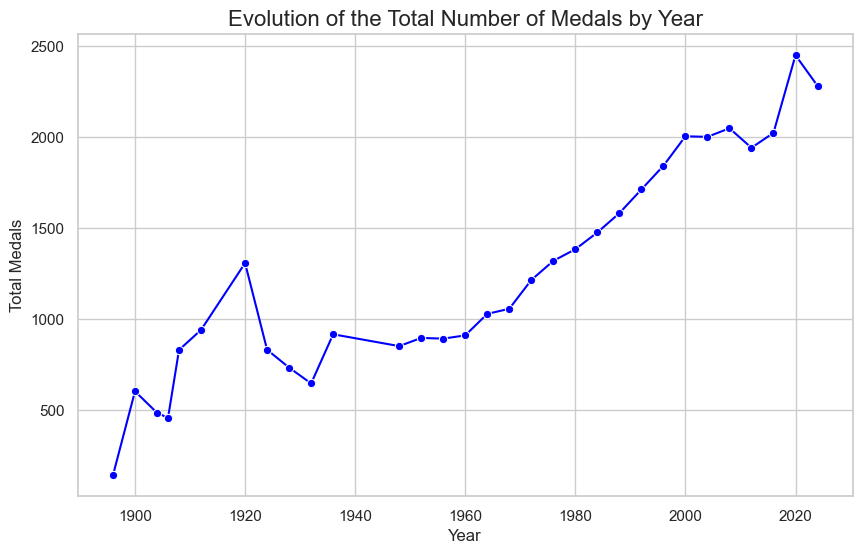

In [118]:
import seaborn as sns
import matplotlib.pyplot as plt

# Evolution of the Total Number of Medals by Year

# Filter out rows where 'Medal' is "No medal"
df_filtered = df[df['Medal'] != 'No medal']

# Group by Year to get total medals per year (Gold + Silver + Bronze), excluding "No medal"
total_medals_by_year = df_filtered.groupby('Year')['Medal'].count().reset_index(name='Total Medals')

# Create a line plot showing the evolution of the total number of medals over time
plt.figure(figsize=(10, 6))
sns.lineplot(data=total_medals_by_year, x='Year', y='Total Medals', marker='o', color='blue')

# Add title and labels
plt.title('Evolution of the Total Number of Medals by Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Medals', fontsize=12)

# Display the plot
plt.show()

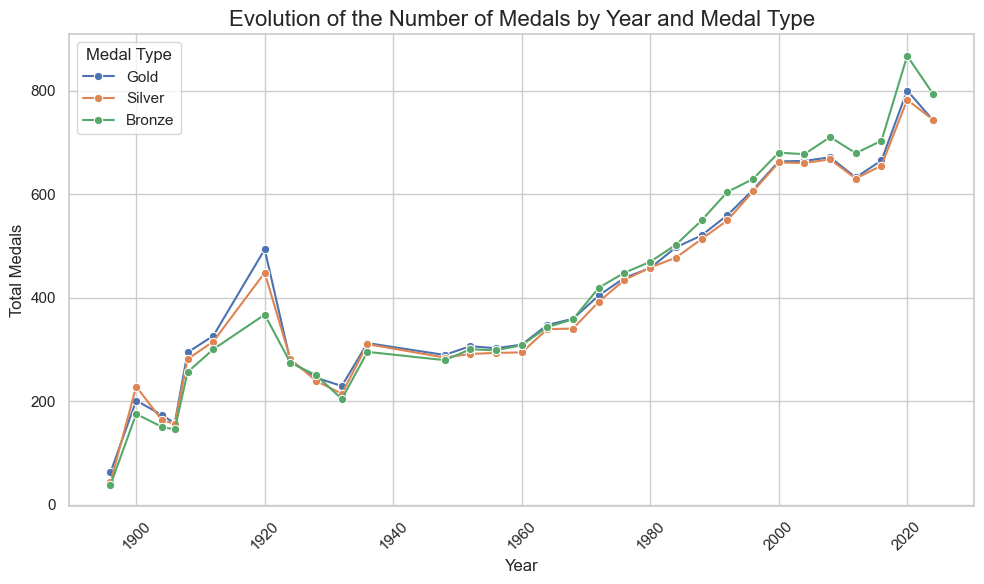

In [119]:
# Evolution of the Number of Medals by Year and Medal Type

# Filter out rows where 'Medal' is "No medal"
df_filtered = df[df['Medal'] != 'No medal']

# Group by Year and Medal type, counting the number of medals
medals_by_year_type = df_filtered.groupby(['Year', 'Medal'])['Medal'].count().reset_index(name='Total Medals')

# Create a line plot showing the evolution of medal counts over time for each medal type
plt.figure(figsize=(10, 6))
sns.lineplot(data=medals_by_year_type, x='Year', y='Total Medals', hue='Medal', 
             marker='o', hue_order=['Gold', 'Silver', 'Bronze'])

# Add title and labels
plt.title('Evolution of the Number of Medals by Year and Medal Type', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Medals', fontsize=12)

# Display the plot
plt.legend(title='Medal Type')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()